In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
xmin = -1
xmax = 1
N_time = 1.0
Tmin = 0.0
Tmax = 0.5
dt = (Tmax-Tmin)/N_time
speed = 0.2
dx = 0.05
N_cell = int((xmax-xmin)/dx)
Xmin = np.linspace(-1, 1, N_cell, endpoint=False)
Xmax = np.linspace(-1+dx, 1, N_cell)
Xj = np.arange(N_cell)

In [5]:
# information of the problem
N_proc = 100
N_per_cell = int(N_proc/10.0) # with x = 0.05 we have 10 cells with positive initial condition
particle_pos = np.zeros(N_proc)
particle_cell = np.zeros(N_proc)
particle_direction = np.zeros(N_proc)
particle_weight = np.zeros(N_proc)
particle_timeleft = np.zeros(N_proc)

In [6]:
scattering=0
absorption=0

In [9]:
num_process = 0
for cmp_cell in np.arange(0, N_cell):
    if (np.round(Xmin[cmp_cell], 2) >= -0.25 and np.round(Xmax[cmp_cell], 2) <= 0.25):
        for cmp_proc in np.linspace(num_process, num_process+N_per_cell, N_per_cell, dtype=int):
            rand = np.random.uniform(low=0.0, high=1.0, size=1)[0]
            pos = rand*(np.round(Xmax[cmp_cell], 2) -
                        np.round(Xmin[cmp_cell], 2))+np.round(Xmax[cmp_cell], 2)
            particle_pos[num_process] = pos
            rand = np.random.uniform(low=0.0, high=1.0, size=1)[0]
            particle_direction[num_process] = rand*2-1
            particle_cell[num_process] = cmp_cell
            particle_weight[num_process] = 1.0/N_per_cell
            num_process = num_process+1

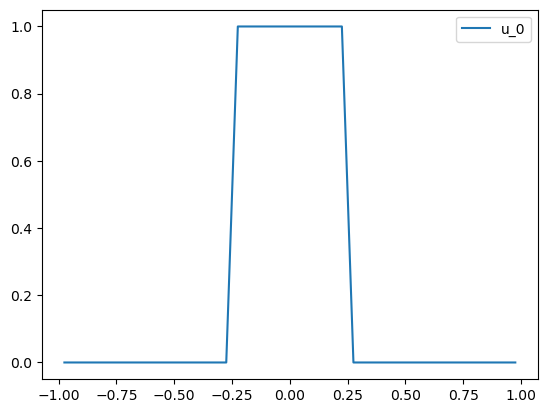

In [12]:
num_process =0
u_init =np.zeros(N_cell)
for cmp_proc in np.arange(0, N_proc):
    u_init[int(particle_cell[cmp_proc])] += particle_weight[cmp_proc]

plt.figure()
plt.plot((Xmin+Xmax)/2, u_init, '-', label='u_0')
plt.legend()

In [17]:
# time loop
for cmp_time in np.arange(Tmin+dt, Tmax+dt, dt):
    #tracking of process:
    for cmp_proc in np.arange(0, N_proc):
        particle_timeleft[cmp_proc] = dt
        while(particle_timeleft[cmp_proc] > 0):
            if (particle_direction[cmp_proc] > 0):
                time_to_out = np.abs(
                    (Xmax[int(particle_cell[cmp_proc])]-particle_pos[cmp_proc])/particle_direction[cmp_proc])
            else:
                time_to_out = np.abs(
                    (Xmin[int(particle_cell[cmp_proc])]-particle_pos[cmp_proc])/particle_direction[cmp_proc])
            time_to_collision =Tmax
            if (scattering>0):
                time_to_collision =np.random.exponential(1.0/scattering)
            min_time = np.min([time_to_out, time_to_collision])
            if(particle_timeleft[cmp_proc] < min_time):
                min_time = particle_timeleft[cmp_proc]
            else:
                if (time_to_out > time_to_collision):
                    min_time = time_to_collision
                    rand = np.random.uniform(low=0.0, high=1.0, size=1)[0]
                    particle_direction[cmp_proc] = rand*2-1
                else:
                    min_time = time_to_out
                    particle_timeleft[cmp_proc] += np.sign(particle_direction[cmp_proc])
                    
            
            particle_weight[cmp_proc] *= np.exp(-absorption*min_time)
            particle_timeleft[cmp_proc] +=speed*particle_direction[cmp_proc]*min_time
            particle_timeleft[cmp_proc] -= min_time

KeyboardInterrupt: 

In [13]:
# we generate the direction process 
for t in np.arange(Tmin,Tmax,dt):
    particle_pos += particle_direction*speed*dt
    particle_cell = (particle_pos/dx+0.5*N_cell).astype(int)
        
       

/tmp/ipykernel_7145/353803110.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  particle_timeleft[cmp_proc] = -np.log(rand)/absorption


NameError: name 'particle' is not defined

In [16]:
a = np.array([1,2,3,4,53.2])


TypeError: only length-1 arrays can be converted to Python scalars